# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


/Users/tianxiaoshan/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part 2: Implement SVD for Dimensionality Reduction

In [13]:
def apply_svd_custom(X_train, X_test, n_components):
    #Compute the covariance matrix (X.T * X)
    cov_matrix = np.dot(X_train.T, X_train)
    
    #Eigenvalue decomposition on Covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    #Sort eigenvectors by eigenvalues in descending order
    sorted_vectors = np.argsort(eigenvalues)[::-1]
    # Select top n_components  
    top_eigenvectors = eigenvectors[:, sorted_vectors[:n_components]]
    
    # Project the training data to new lower-dimensional subspace
    X_train_reduced = np.dot(X_train, top_eigenvectors)
    
    #Project the test data using the same singular vectors
    X_test_reduced = np.dot(X_test, top_eigenvectors)
    
    return X_train_reduced, X_test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [10]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [11]:
# Define the range of SVD components to experiment with
svd_components = [784, 516, 256, 100, 64, 10]  # You can adjust these values to explore different dimensions

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results for future analysis
    results.append((n_components, accuracy, training_time))
    
    # Print the results for this number of components
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Now you can analyze the `results` list or plot the data in the next part


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9209, Training time: 728.9321 seconds
Applying custom SVD with 516 components...
SVD components: 516, Accuracy: 0.9204, Training time: 410.6310 seconds
Applying custom SVD with 256 components...
SVD components: 256, Accuracy: 0.9210, Training time: 107.0453 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 26.7361 seconds
Applying custom SVD with 64 components...
SVD components: 64, Accuracy: 0.9137, Training time: 9.6690 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8020, Training time: 0.4165 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


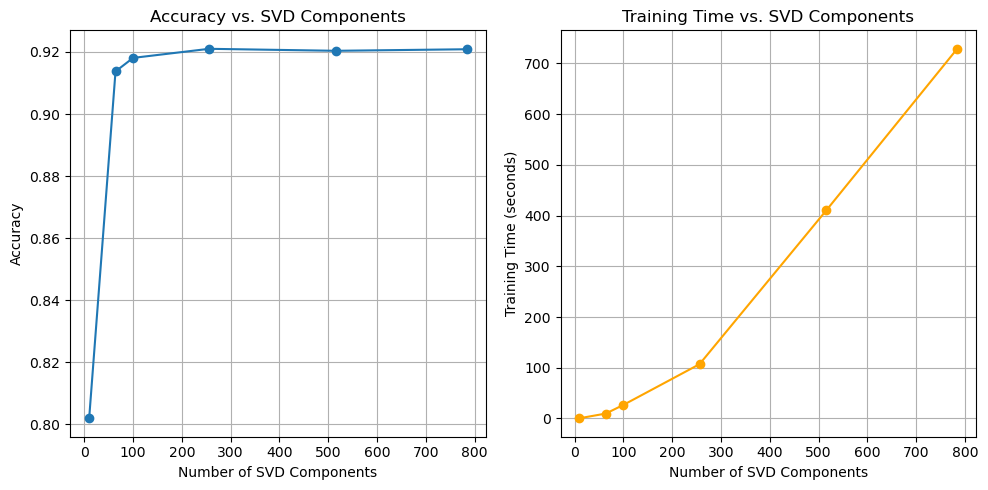

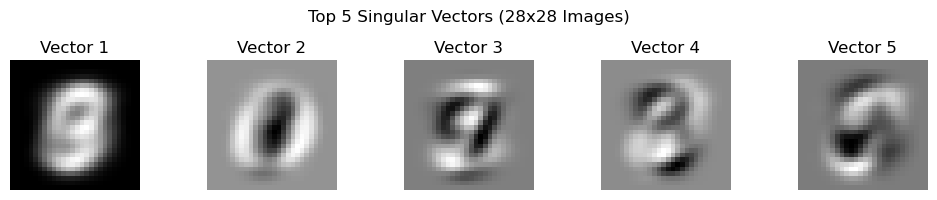

In [18]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
import matplotlib.pyplot as plt

# Part 5: Visualize and Analyze the Results
# Extract data from the results list for plotting
components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title("Accuracy vs. SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot Training Time vs. Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title("Training Time vs. SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (seconds)")
plt.grid(True)

plt.tight_layout()
plt.show()

##Visualize Top 5 Singular Vectors as 28x28 images
def top_5_singular_vectors(X_train, n_components=5):
    #Apply full SVD to the training data
    cov_matrix = np.dot(X_train.T, X_train)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    sorted_vectors = np.argsort(eigenvalues)[::-1] 
    # Top 5 singular vectors
    top_eigenvectors = eigenvectors[:, sorted_vectors[:n_components]] 
    
    # Reshape each singular vector to 28x28 and plot them
    plt.figure(figsize=(10, 2))
    for i in range(n_components):
        singular_vector_image = top_eigenvectors[:, i].reshape(28, 28)
        plt.subplot(1, n_components, i + 1)
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f"Vector {i+1}")
        plt.axis('off')
    
    plt.suptitle(f"Top {n_components} Singular Vectors (28x28 Images)")
    plt.tight_layout()
    plt.show()

# Visualize the top 5 singular vectors from the full dataset
top_5_singular_vectors(X_train)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: The results show a clear trade-off between dimensionality reduction, model accuracy, and training time. As observed in the graphs, increasing the number of SVD components initially increases accuracy rapidly, peaking around 100 components. Beyond that, additional components do not significantly improve accuracy, which remains stable at approximately 92%. However, the training time continues to increase somewhat linearly with the number of components, demonstrating a substantial computational cost associated with higher-dimensional representations. This suggests that choosing around 100 components provides a good balance between model performance and efficiency. The visualization of the top 5 singular vectors reveals that they capture key structural features of the digits, indicating that SVD effectively preserves the most important patterns in the data even with reduced dimensionality.